<a href="https://colab.research.google.com/github/kyrcha/deep-learning-pipelines/blob/master/simple_keras_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Keras model for classification

For a dataset in this simple Keras classification example we will use the [Wisconsin breast cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29). We will upload data from the local drive and in particular the file `breast-cancer-wisconsin.data`. Other ways to upload files to a Google colab notebook can be found [here](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92).


In [0]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer-wisconsin.data to breast-cancer-wisconsin.data


Now let's read the dataset.

In [0]:
import pandas as pd
import io
data = pd.read_csv(io.BytesIO(uploaded['breast-cancer-wisconsin.data']), 
                   header=None, na_values='?')
# Dataset is now stored in a Pandas Dataframe

Let's check if it was uploaded and parsed correctly

In [0]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


We will drop the first column which is the id of the sample and will not provide anything to the predictive ability of the model and also drop samples with missing values in order to have a pristine dataset. Then we will print the summary statistics of the dataset.

In [0]:
data = data.drop(0, axis=1).dropna()

In [0]:
data.describe()

,1,2,3,4,5,6,7,8,9,10
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


We will normalize the data between 0 and 1 by dividing the attributes by 10.

In [0]:

data.iloc[:,0:9] = data.iloc[:,0:9].div(10)
data.head()

,1,2,3,4,5,6,7,8,9,10
0,0.5,0.1,0.1,0.1,0.2,0.1,0.3,0.1,0.1,2
1,0.5,0.4,0.4,0.5,0.7,1.0,0.3,0.2,0.1,2
2,0.3,0.1,0.1,0.1,0.2,0.2,0.3,0.1,0.1,2
3,0.6,0.8,0.8,0.1,0.3,0.4,0.3,0.7,0.1,2
4,0.4,0.1,0.1,0.3,0.2,0.1,0.3,0.1,0.1,2


Now let's try to predict whether the cancer is benign (2) or malignant (4), based on the 9 available features. First we will do a Train-Test split of 80-20%. We will keep the 20% to test the model in the end. We will also do one-hot-encoding for the class variable.

In [0]:
from sklearn.utils import shuffle
data = shuffle(data)

X = data.iloc[:,0:8]
y = data.iloc[:,9].apply(str)
y[y == '2'] = '0'
y[y == '4'] = '1'
from keras.utils import to_categorical
encoded_y = to_categorical(y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, 
                                                    test_size=0.2, 
                                                    random_state=1234)

print(X_train[:5])
print(y_train[:5])



       1    2    3    4    5    6    7    8
344  0.7  0.6  0.4  0.8  1.0  1.0  0.9  0.5
22   0.3  0.1  0.1  0.1  0.2  0.1  0.2  0.1
124  0.5  0.4  0.6  0.7  0.9  0.7  0.8  1.0
239  1.0  0.4  0.3  0.2  0.3  1.0  0.5  0.3
552  0.3  0.2  0.2  0.2  0.2  0.1  0.4  0.2
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [0]:
import tensorflow as tf
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

We will build a simple feedforward neural net with one hidden layer with 20 nodes.

In [0]:
l0 = tf.keras.layers.Dense(units=20, input_shape=(8,), 
                           activation='relu')
l1 = tf.keras.layers.Dense(units=2, activation='sigmoid')  
model = tf.keras.Sequential([l0, l1])
model.compile(optimizer ='adam', loss='binary_crossentropy', 
              metrics =['accuracy'])

In [0]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)
print('Finished training')

Train on 491 samples, validate on 55 samples
Epoch 1/100
491/491 [==============================] - 0s 419us/sample - loss: 0.6856 - acc: 0.4919 - val_loss: 0.6642 - val_acc: 0.5091
Epoch 2/100
491/491 [==============================] - 0s 55us/sample - loss: 0.6624 - acc: 0.5662 - val_loss: 0.6394 - val_acc: 0.6909
Epoch 3/100
491/491 [==============================] - 0s 55us/sample - loss: 0.6394 - acc: 0.7566 - val_loss: 0.6147 - val_acc: 0.8455
Epoch 4/100
491/491 [==============================] - 0s 53us/sample - loss: 0.6150 - acc: 0.8595 - val_loss: 0.5874 - val_acc: 0.9000
Epoch 5/100
491/491 [==============================] - 0s 56us/sample - loss: 0.5867 - acc: 0.9053 - val_loss: 0.5581 - val_acc: 0.9000
Epoch 6/100
491/491 [==============================] - 0s 56us/sample - loss: 0.5573 - acc: 0.9236 - val_loss: 0.5270 - val_acc: 0.9091
Epoch 7/100
491/491 [==============================] - 0s 55us/sample - loss: 0.5262 - acc: 0.9318 - val_loss: 0.4961 - val_acc: 0.9182
Ep

Now let's plot the loss based on the training epochs.

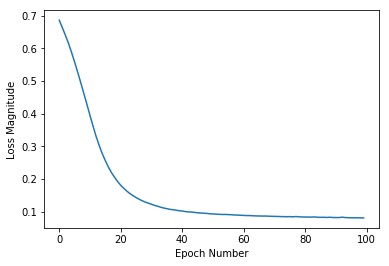

In [0]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [0]:
eval_model=model.evaluate(X_train, y_train)
eval_model

546/546 [==============================] - 0s 43us/sample - loss: 0.0879 - acc: 0.9689


[0.08786988179216455, 0.96886444]

The training accuracy is 96.8%.

In [0]:
from numpy import argmax
y_pred_probs = model.predict(X_test)
#inverted = argmax(y_pred)
y_pred = [argmax(y) for y in y_pred_probs]

from sklearn.metrics import confusion_matrix
inverted = [argmax(y) for y in y_test]
cm = confusion_matrix(inverted, y_pred)

print("Confusion Matrix")
print(cm)
print("Accuracy is: {0:.2f}%".format(100*(cm[0,0] + cm[1,1])/sum(sum(cm))))

Confusion Matrix
[[80  1]
 [ 2 54]]
Accuracy is: 97.81%


The accuracy in the unseen test set is 97.81% with only 1 False Positive and 2 False Negatives.